In [94]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from finta import TA as ta

In [95]:
start = '2020-09-01'       # Begin date for downloading stock data format: YYYY-MM-DD         
end = dt.datetime.now()    # today

In [96]:
#Get input from the user
stock_symbol = input("Enter the ticker of the stock that you want to analyze/predict: ")

Enter the ticker of the stock that you want to analyze/predict: AAPL


In [97]:
 df = yf.download(stock_symbol,start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [98]:
df_copy=df.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,132.759995,134.800003,130.529999,134.179993,132.763748,151948100
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.013077,200119000
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.604111,257599600
2020-09-04,120.070000,123.699997,110.889999,120.959999,119.683266,332607200
2020-09-08,113.949997,118.989998,112.680000,112.820000,111.629189,231366600


In [99]:
# get data from finta for RSI, MACD,
df=df.join(pd.DataFrame(ta.RSI(df),columns=None), how='outer')
df=df.rename(columns={"14 period RSI":"RSI_14_Day"})
df=df.join(pd.DataFrame(ta.MACD(df),columns=None), how='outer')
df=df.rename(columns={"MACD":"Moving Average Convergence Divergence_MACD"})
df=df.join(pd.DataFrame(ta.TSI(df),columns=None), how='outer')
df=df.rename(columns={"TSI":"True Strength Index TSI"})

In [100]:
df = df.drop('signal', 1)
df = df.drop('SIGNAL', 1)

/var/folders/d0/34c8zjhj0s7b35v2y9652s_m0000gp/T/ipykernel_62961/3658695331.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('signal', 1)
/var/folders/d0/34c8zjhj0s7b35v2y9652s_m0000gp/T/ipykernel_62961/3658695331.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('SIGNAL', 1)


In [101]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,True Strength Index TSI
Date,,,,,,,,,
2020-09-01,132.759995,134.800003,130.529999,134.179993,132.763748,151948100,NaN,0.000000,NaN
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.013077,200119000,0.000000,-0.062372,NaN
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.604111,257599600,0.000000,-0.405698,NaN
2020-09-04,120.070000,123.699997,110.889999,120.959999,119.683266,332607200,0.653310,-0.549019,NaN
2020-09-08,113.949997,118.989998,112.680000,112.820000,111.629189,231366600,0.380748,-0.939248,NaN
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.081688,176940500,20.201280,-0.963752,NaN
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.292122,182274400,17.085475,-1.136371,NaN
2020-09-11,114.570000,115.230003,110.000000,112.000000,110.817848,180860300,16.048435,-1.304711,NaN
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.142380,140150100,26.833419,-1.234729,NaN


In [102]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [103]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [104]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,True Strength Index TSI,SMA_20,SMA_50
Date,,,,,,,,,,,
2020-09-01,132.759995,134.800003,130.529999,134.179993,132.763748,151948100,NaN,0.000000,NaN,NaN,NaN
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.013077,200119000,0.000000,-0.062372,NaN,NaN,NaN
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.604111,257599600,0.000000,-0.405698,NaN,NaN,NaN
2020-09-04,120.070000,123.699997,110.889999,120.959999,119.683266,332607200,0.653310,-0.549019,NaN,NaN,NaN
2020-09-08,113.949997,118.989998,112.680000,112.820000,111.629189,231366600,0.380748,-0.939248,NaN,NaN,NaN


In [105]:
# Adding volume moving average column
Volume_MA = 10
#for i in Volume_MA:
df["Vol_Avg"]= df.iloc[:,5].rolling(window=Volume_MA).mean()

In [106]:
# Adding Moving average indicator
Volume_MAI = 0
#for i in Volume_MA:
df["Vol_Avg_Ind"]= df.iloc[:,5]/df.iloc[:,8]#.rolling(window=Volume_MA).mean()

In [107]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,True Strength Index TSI,SMA_20,SMA_50,Vol_Avg,Vol_Avg_Ind
Date,,,,,,,,,,,,,
2022-03-16,157.050003,160.000000,154.460007,159.589996,159.355865,102300200,45.996781,-3.461964,-18.399880,161.923593,166.847516,98574630.0,-5.559830e+06
2022-03-17,158.610001,161.000000,157.630005,160.619995,160.384354,75615400,47.344011,-3.090654,-16.267663,161.327968,166.471042,98468330.0,-4.648203e+06
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,51.586997,-2.496487,-13.079862,161.083327,166.257009,102445780.0,-9.442890e+06
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.137375,95811400,53.276412,-1.890839,-9.985072,160.987469,166.129174,102385040.0,-9.595464e+06
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.572327,81532000,57.226123,-1.120365,-6.087197,161.212138,166.066647,97423410.0,-1.339401e+07
2022-03-23,167.990005,172.639999,167.649994,170.210007,169.960297,98062700,58.743731,-0.393066,-2.449366,161.718394,166.031481,98084190.0,-4.003594e+07
2022-03-24,171.059998,174.139999,170.210007,174.070007,173.814621,90131400,62.701331,0.489154,1.957595,162.284063,166.015760,96563130.0,4.604191e+07
2022-03-25,173.880005,175.279999,172.750000,174.720001,174.463669,80546200,63.339083,1.226630,5.696480,162.776839,166.004044,94920740.0,1.413965e+07
2022-03-28,172.169998,175.729996,172.000000,175.600006,175.342377,90371900,64.230802,1.860645,9.033310,163.300070,166.076519,93084720.0,1.000430e+07


In [108]:
#Export to csv
df.to_csv('AAPL.csv')

In [109]:
df.index = pd.to_datetime(df.index)
df.reset_index(inplace=True)

In [110]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,True Strength Index TSI,SMA_20,SMA_50,Vol_Avg,Vol_Avg_Ind
0,2020-09-01,132.759995,134.800003,130.529999,134.179993,132.763748,151948100,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,2020-09-02,137.589996,137.979996,127.000000,131.399994,130.013077,200119000,0.000000,-0.062372,NaN,NaN,NaN,NaN,NaN
2,2020-09-03,126.910004,128.839996,120.500000,120.879997,119.604111,257599600,0.000000,-0.405698,NaN,NaN,NaN,NaN,NaN
3,2020-09-04,120.070000,123.699997,110.889999,120.959999,119.683266,332607200,0.653310,-0.549019,NaN,NaN,NaN,NaN,NaN
4,2020-09-08,113.949997,118.989998,112.680000,112.820000,111.629189,231366600,0.380748,-0.939248,NaN,NaN,NaN,NaN,NaN


In [111]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    RSI=df['RSI_14_Day']
    close=df['Adj Close'][i]
    buy_Date=df['Date'][i]
    
    if(SMA_short[i] > SMA_long[i] and RSI[i]<=40):
        print(stock_symbol ,' Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print (buy_Date)
            print("Buy " + stock_symbol  + " at the price : " +str(buyP) + " on : " , buy_Date)
    elif(SMA_short[i] < SMA_long[i] and RSI[i]>50):
        print(stock_symbol ,' Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell " + stock_symbol  + " at the price : " + str(sellP) + " on : " , buy_Date)
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)
    elif (RSI[i]<50 and RSI[i]>30):
        print(buy_Date ,'Hold')
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell " + stock_symbol  + " at the price : " + str(sellP) + " on : " , buy_Date)
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

2020-09-22 00:00:00 Hold
2020-09-24 00:00:00 Hold
2020-09-25 00:00:00 Hold
2020-09-28 00:00:00 Hold
2020-09-29 00:00:00 Hold
2020-09-30 00:00:00 Hold
2020-10-01 00:00:00 Hold
2020-10-02 00:00:00 Hold
2020-10-05 00:00:00 Hold
2020-10-06 00:00:00 Hold
2020-10-07 00:00:00 Hold
2020-10-08 00:00:00 Hold
2020-10-19 00:00:00 Hold
2020-10-20 00:00:00 Hold
2020-10-21 00:00:00 Hold
2020-10-22 00:00:00 Hold
2020-10-23 00:00:00 Hold
2020-10-26 00:00:00 Hold
2020-10-27 00:00:00 Hold
2020-10-28 00:00:00 Hold
2020-10-29 00:00:00 Hold
2020-10-30 00:00:00 Hold
2020-11-02 00:00:00 Hold
2020-11-03 00:00:00 Hold
2020-11-04 00:00:00 Hold
2020-11-23 00:00:00 Hold
2020-11-24 00:00:00 Hold
2020-11-25 00:00:00 Hold
2020-11-27 00:00:00 Hold
2021-01-06 00:00:00 Hold
2021-01-15 00:00:00 Hold
2021-01-19 00:00:00 Hold
2021-01-29 00:00:00 Hold
2021-02-16 00:00:00 Hold
2021-02-17 00:00:00 Hold
2021-02-18 00:00:00 Hold
2021-02-19 00:00:00 Hold
AAPL  Up trend
2021-02-22 00:00:00
Buy AAPL at the price : 125.07177734375 

In [112]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 0 up to now with 5 trades:
SMAs used: [20, 50]
Total return over 5 trades: 12.48%


In [113]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 3.0802293502797733
Average Loss: -0.3412652207521516
Max Return: 5.143477790638551
Max Loss: -0.3412652207521516
Gain/loss ratio: 9.02591053225676


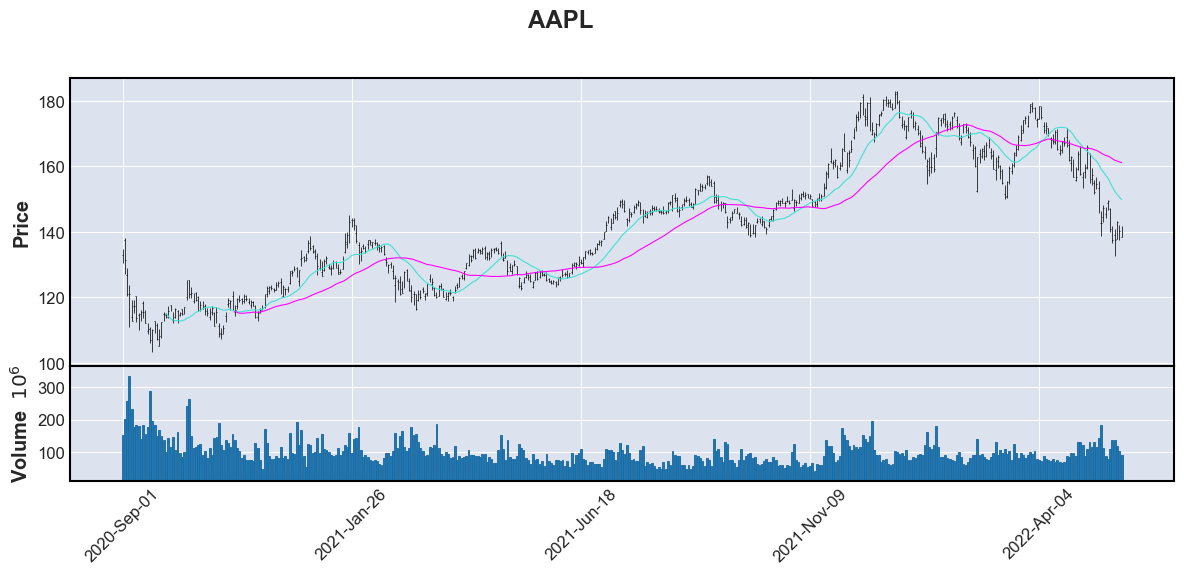

In [114]:
mpf.plot(df_copy, type = 'ohlc',figratio=(16,6),  # PN - Open, High, Low and Closing chart
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock_symbol), 
         style='default')